# DEMO: **Time Series Analysis** with Financial Data

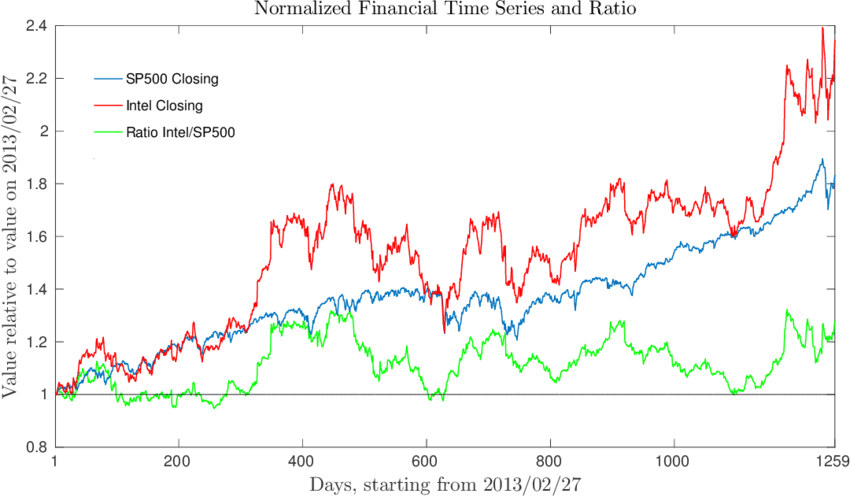

Financial analysts use time series data such as stock price movements, or a company’s sales over time, to analyze a company’s performance [see Corporate Finance Institute](https://corporatefinanceinstitute.com/resources/data-science/time-series-data-analysis/).

Investors can take advantage of new growth investing strategies in order to more precisely hone in on stocks or other investments offering above-average profit potential. When it comes to investing in the stock market, there are always a variety of approaches that can be taken.

The goal, however, is generally always the same, regardless of the approach – grow your investments and increase your profits [see Corporate Finance Institute](https://corporatefinanceinstitute.com/resources/capital-markets/a-guide-to-growth-investing/)

<br>

---  
Source:  
+ [Candle Stick Charts with Plotly](https://plotly.com/python/candlestick-charts/)  
+ [Scatter Plot of Financial Data with Plotly](https://plotly.com/python/line-and-scatter/)  
+ [Bar Race Charts](https://www.analyticsvidhya.com/blog/2021/07/construct-various-types-of-bar-race-charts-with-plotly/)
+ [Feature Engineering Techniques For Time Series Data](https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/)
+ [Differencing Time Series](https://towardsdatascience.com/an-intuitive-guide-to-differencing-time-series-in-python-1d6c7a2c067a)

---  
Data ([from Yahoo Finance](https://finance.yahoo.com/)):
+ Credit Suisse Stock Market Price (April 2009 - March 2023) -- **DATA-CS.csv**
+ UBS Group Stock Market Price (April 2009 - March 2023) -- **DATA-UBS.csv**
---  

Author:
+ dr. daniel benninger  

History:  
+ 2023-04-06 v2 dbe --- initial version for BINA FS23  
+ April 2024, dbe   --- minor corrections for BINA FS24
---

## Load Libraries and Check Environment

In [1]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
print("Pandas Version: ",pd.__version__)

Pandas Version:  1.5.3


## Load Financial Data and Verify Structure/Format/Values

In [6]:
# load the financial dataset from the BINA github repositors
filePATH = "https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/LB06-Regression%2BTimeSeries/Python/"
fileNAME = "DATA-CS.csv"

data = pd.read_csv(filePATH+fileNAME)

# OPTION: load the financial dataset from a local file
# data = pd.read_csv('DATA-CS.csv')

In [7]:
data.shape

(3524, 7)

In [9]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-04-06,29.658203,30.937500,29.541016,30.703125,20.256773,3253043
1,2009-04-07,29.482422,29.960938,29.072266,29.482422,19.451399,1795584
2,2009-04-08,30.361328,30.908203,29.746094,30.644531,20.218113,1202688
3,2009-04-09,31.240234,33.027344,31.025391,32.841797,21.667789,2358579
4,2009-04-13,32.470703,34.423828,32.285156,33.974609,22.415174,1897062


In [18]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
3519,2023-03-29,0.87,0.90,0.87,0.88,0.88,32200700
3520,2023-03-30,0.90,0.90,0.87,0.87,0.87,19909000
3521,2023-03-31,0.88,0.91,0.88,0.89,0.89,22234800
3522,2023-04-03,0.89,0.89,0.87,0.88,0.88,12808600
3523,2023-04-04,0.88,0.89,0.88,0.89,0.89,13348800


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3.524000e+03
mean,21.714721,21.902277,21.504521,21.708342,16.745795,4.267032e+06
std,12.494230,12.609161,12.356681,12.490288,7.632176,1.254198e+07
min,0.820000,0.860000,0.820000,0.850000,0.850000,1.301500e+05
25%,12.090000,12.190000,12.020000,12.097500,11.051464,1.283234e+06
50%,17.231445,17.440703,17.124454,17.302578,14.742901,2.185800e+06
75%,28.840000,28.992500,28.625000,28.825000,21.594921,3.759675e+06
max,58.300781,58.671875,57.509766,58.437500,38.651604,4.341040e+08


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3524 non-null   object 
 1   Open       3524 non-null   float64
 2   High       3524 non-null   float64
 3   Low        3524 non-null   float64
 4   Close      3524 non-null   float64
 5   Adj Close  3524 non-null   float64
 6   Volume     3524 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.8+ KB


## Convert date colume to **datetime** format

In [10]:
# convert date colume to "datetime" format
data[["Date"]] = data[["Date"]].apply(pd.to_datetime)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3524 non-null   datetime64[ns]
 1   Open       3524 non-null   float64       
 2   High       3524 non-null   float64       
 3   Low        3524 non-null   float64       
 4   Close      3524 non-null   float64       
 5   Adj Close  3524 non-null   float64       
 6   Volume     3524 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 192.8 KB


---
## Select time range and plot time series
Select a specific (from - to) timeframe

In [19]:
from_date = "2010-01-01"
to_date   = "2023-01-01"

df = data[(data['Date'] > from_date) & (data['Date'] < to_date)]
# df = data[(data['Date'] > from_date)]

and plot the financial time series OHLC as **candlesticks** using *plotly.graph_objects*

In [22]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(
    title="Finance Institutes - Stock Market Price <br><sup>CREDIT SUISSE</sup>",
    yaxis_title='US$',
    width=1000, height=600,
    yaxis_range = (0,60))


fig.show()

---  
## Some **Feature Engineering Techniques** applied to Financial Time Series Data

### **Date-Related** Features   
Information about the day, month, year e.g. *day of the week*, *quarter*, *day/week of year* etc.

In [23]:
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day

data['dayofweek_num']=data['Date'].dt.dayofweek
data['dayofyear_num']=data['Date'].dt.dayofyear
data['weekofyear_num']=data['Date'].dt.week
data['quarter_num']=data['Date'].dt.quarter
data['daysinmonth_num']=data['Date'].dt.days_in_month

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,dayofweek_num,dayofyear_num,weekofyear_num,quarter_num,daysinmonth_num
0,2009-04-06,29.658203,30.937500,29.541016,30.703125,20.256773,3253043,2009,4,6,0,96,15,2,30
1,2009-04-07,29.482422,29.960938,29.072266,29.482422,19.451399,1795584,2009,4,7,1,97,15,2,30
2,2009-04-08,30.361328,30.908203,29.746094,30.644531,20.218113,1202688,2009,4,8,2,98,15,2,30
3,2009-04-09,31.240234,33.027344,31.025391,32.841797,21.667789,2358579,2009,4,9,3,99,15,2,30
4,2009-04-13,32.470703,34.423828,32.285156,33.974609,22.415174,1897062,2009,4,13,0,103,16,2,30


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3524 non-null   datetime64[ns]
 1   Open             3524 non-null   float64       
 2   High             3524 non-null   float64       
 3   Low              3524 non-null   float64       
 4   Close            3524 non-null   float64       
 5   Adj Close        3524 non-null   float64       
 6   Volume           3524 non-null   int64         
 7   year             3524 non-null   int64         
 8   month            3524 non-null   int64         
 9   day              3524 non-null   int64         
 10  dayofweek_num    3524 non-null   int64         
 11  dayofyear_num    3524 non-null   int64         
 12  weekofyear_num   3524 non-null   int64         
 13  quarter_num      3524 non-null   int64         
 14  daysinmonth_num  3524 non-null   int64  

---  
### **Lag-Related** Features  
If we like predicting the stock price for a company. So, the previous day’s stock price is important to make a prediction. In other words, the value at time t is greatly affected by the value at time t-1. The past values are known as lags, so t-1 is lag 1, t-2 is lag 2, and so on.

In [26]:
# add lag related values to date row
lag_degree = 1
data['lag_1'] = data['Close'].shift(lag_degree)

dataX = data[['Date', 'lag_1', 'Close']]
dataX.head()

,Date,lag_1,Close
0,2009-04-06,NaN,30.703125
1,2009-04-07,30.703125,29.482422
2,2009-04-08,29.482422,30.644531
3,2009-04-09,30.644531,32.841797
4,2009-04-13,32.841797,33.974609


In [27]:
# calculate now easily the DoD performance
dataX['performance_1'] = dataX['Close']-dataX['lag_1']

dataX.head()

,Date,lag_1,Close,performance_1
0,2009-04-06,NaN,30.703125,NaN
1,2009-04-07,30.703125,29.482422,-1.220703
2,2009-04-08,29.482422,30.644531,1.162109
3,2009-04-09,30.644531,32.841797,2.197266
4,2009-04-13,32.841797,33.974609,1.132812


If the series has a weekly trend, which means the value last Monday can be used to predict the value for this Monday, we should create lag features for seven days.

We can create multiple lag features as well! Let’s say we want lag 1 to lag 7 – we can let the model decide which is the most valuable one. So, if we train a linear regression model, it will assign appropriate weights (or coefficients) to the lag features

In [28]:
data['lag_1'] = data['Close'].shift(1)
data['lag_2'] = data['Close'].shift(2)
data['lag_3'] = data['Close'].shift(3)
data['lag_4'] = data['Close'].shift(4)
data['lag_5'] = data['Close'].shift(5)
data['lag_6'] = data['Close'].shift(6)
data['lag_7'] = data['Close'].shift(7)

dataX = data[['Date', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'Close']]
dataX.head(5)

,Date,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,Close
0,2009-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.703125
1,2009-04-07,30.703125,NaN,NaN,NaN,NaN,NaN,NaN,29.482422
2,2009-04-08,29.482422,30.703125,NaN,NaN,NaN,NaN,NaN,30.644531
3,2009-04-09,30.644531,29.482422,30.703125,NaN,NaN,NaN,NaN,32.841797
4,2009-04-13,32.841797,30.644531,29.482422,30.703125,NaN,NaN,NaN,33.974609
5,2009-04-14,33.974609,32.841797,30.644531,29.482422,30.703125,NaN,NaN,31.689453
6,2009-04-15,31.689453,33.974609,32.841797,30.644531,29.482422,30.703125,NaN,32.910156
7,2009-04-16,32.910156,31.689453,33.974609,32.841797,30.644531,29.482422,30.703125,35.087891
8,2009-04-17,35.087891,32.910156,31.689453,33.974609,32.841797,30.644531,29.482422,33.300781
9,2009-04-20,33.300781,35.087891,32.910156,31.689453,33.974609,32.841797,30.644531,30.361328


In [31]:
dataX['performance_7'] = dataX['Close']-dataX['lag_7']
dataX.head(10)

,Date,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,Close,performance_7
0,2009-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.703125,NaN
1,2009-04-07,30.703125,NaN,NaN,NaN,NaN,NaN,NaN,29.482422,NaN
2,2009-04-08,29.482422,30.703125,NaN,NaN,NaN,NaN,NaN,30.644531,NaN
3,2009-04-09,30.644531,29.482422,30.703125,NaN,NaN,NaN,NaN,32.841797,NaN
4,2009-04-13,32.841797,30.644531,29.482422,30.703125,NaN,NaN,NaN,33.974609,NaN
5,2009-04-14,33.974609,32.841797,30.644531,29.482422,30.703125,NaN,NaN,31.689453,NaN
6,2009-04-15,31.689453,33.974609,32.841797,30.644531,29.482422,30.703125,NaN,32.910156,NaN
7,2009-04-16,32.910156,31.689453,33.974609,32.841797,30.644531,29.482422,30.703125,35.087891,4.384766
8,2009-04-17,35.087891,32.910156,31.689453,33.974609,32.841797,30.644531,29.482422,33.300781,3.818359
9,2009-04-20,33.300781,35.087891,32.910156,31.689453,33.974609,32.841797,30.644531,30.361328,-0.283203


In [35]:
date_from = "2019-01-01"
date_to   = "2022-12-31"
df= dataX[(dataX['Date'] > date_from) & (dataX['Date'] < date_to)]

# Create Line plot
import plotly.express as px
fig = px.line(df, x=df['Date'], y=['Close', 'lag_1', 'lag_7', 'performance_7'])


# Setup Layout
fig.update_layout(
    title="Finance Institutes - Stock Market Price with Lagged Values and (7-Days) Performance <br><sup>CREDIT SUISSE</sup>",
    legend_title="Data Points",
    yaxis_title='US$',
    width=1000, height=600,
    yaxis_range = (-5,15))

# Display the plot
fig.show()

---  
### **Rolling Window** Features  
How about calculating some statistical values based on past values? This method is called the rolling window method because the window would be different for every data point.  

We will select a window size, take the average of the values in the window, and use it as a feature.

In [37]:
# calculate rolling mean over a defined date window
window_size = 7
data['rolling_mean7'] = data['Close'].rolling(window=window_size).mean()

dataX = data[['Date', 'rolling_mean7', 'Close']]
dataX.head(10)

,Date,rolling_mean7,Close
0,2009-04-06,NaN,30.703125
1,2009-04-07,NaN,29.482422
2,2009-04-08,NaN,30.644531
3,2009-04-09,NaN,32.841797
4,2009-04-13,NaN,33.974609
5,2009-04-14,NaN,31.689453
6,2009-04-15,31.749442,32.910156
7,2009-04-16,32.375837,35.087891
8,2009-04-17,32.921317,33.300781
9,2009-04-20,32.880859,30.361328


In [38]:
date_from = "2019-01-01"
date_to   = "2019-12-31"
df= dataX[(dataX['Date'] > date_from) & (dataX['Date'] < date_to)]


# Create Line plot
import plotly.express as px
fig = px.line(df, x=df['Date'], y=['Close', 'rolling_mean7'])


# Setup Layout
fig.update_layout(
    title="Finance Institutes - Stock Market Price with Rolling Means <br><sup>CREDIT SUISSE</sup>",
    legend_title="Data Points",
    yaxis_title='US$',
    width=1000, height=600,
    yaxis_range = (10,15))

# Display the plot
fig.show()

In [39]:
# calculate rolling mean of 20, 60 days
data['rolling_mean20'] = data['Close'].rolling(window=20).mean()
data['rolling_mean60'] = data['Close'].rolling(window=60).mean()

dataY = data[['Date', 'Close','rolling_mean20','rolling_mean60',]]
dataY.head(25)

,Date,Close,rolling_mean20,rolling_mean60
0,2009-04-06,30.703125,NaN,NaN
1,2009-04-07,29.482422,NaN,NaN
2,2009-04-08,30.644531,NaN,NaN
3,2009-04-09,32.841797,NaN,NaN
4,2009-04-13,33.974609,NaN,NaN
5,2009-04-14,31.689453,NaN,NaN
6,2009-04-15,32.910156,NaN,NaN
7,2009-04-16,35.087891,NaN,NaN
8,2009-04-17,33.300781,NaN,NaN
9,2009-04-20,30.361328,NaN,NaN


In [40]:
date_from = "2019-01-01"
date_to   = "2019-12-31"
df= dataY[(dataX['Date'] > date_from) & (dataY['Date'] < date_to)]

# Create Line plot
import plotly.express as px
fig = px.line(df, x=df['Date'], y=['Close', 'rolling_mean20','rolling_mean60'])


# Setup Layout
fig.update_layout(
    title="Finance Institutes - Stock Market Price with Rolling Means <br><sup>CREDIT SUISSE</sup>",
    legend_title="Data Points",
    yaxis_title='US$',
    width=1000, height=600,
    yaxis_range = (10,15))

# Display the plot
fig.show()

---  
### **Differencing** Time Series
Differencing is a method of transforming a time series dataset. Differencing is performed by subtracting the previous observation from the current observation.  

Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

In [41]:
dataZ = data[['Date', 'Close']]

period_diff = 1
dataZ['diff1'] = dataZ['Close'].diff(periods=period_diff)

dataZ.head()

,Date,Close,diff1
0,2009-04-06,30.703125,NaN
1,2009-04-07,29.482422,-1.220703
2,2009-04-08,30.644531,1.162109
3,2009-04-09,32.841797,2.197266
4,2009-04-13,33.974609,1.132812


In [57]:
dataZ['diff2'] = dataZ['Close'].diff(periods=2)
dataZ['diff5'] = dataZ['Close'].diff(periods=5)

dataZ.head(10)

,Date,Close,diff2,diff5
0,2009-04-06,30.703125,NaN,NaN
1,2009-04-07,29.482422,NaN,NaN
2,2009-04-08,30.644531,-0.058594,NaN
3,2009-04-09,32.841797,3.359375,NaN
4,2009-04-13,33.974609,3.330078,NaN
5,2009-04-14,31.689453,-1.152344,0.986328
6,2009-04-15,32.910156,-1.064453,3.427734
7,2009-04-16,35.087891,3.398438,4.443360
8,2009-04-17,33.300781,0.390625,0.458984
9,2009-04-20,30.361328,-4.726563,-3.613281


In [59]:
date_from = "2019-01-01"
date_to   = "2019-12-31"
df= dataZ[(dataZ['Date'] > date_from) & (dataZ['Date'] < date_to)]

# Create Line plot
import plotly.express as px
fig = px.line(df, x=df['Date'], y=['Close', 'diff2','diff5'])


# Setup Layout
fig.update_layout(
    title="Finance Institutes - Stock Market Price with Differencing <br><sup>CREDIT SUISSE</sup>",
    legend_title="Data Points",
    yaxis_title='US$',
    width=1000, height=600,
    yaxis_range = (-5,15))

# Display the plot
fig.show()

---  
## **ADD ON:** Line or Bar Charts for Time Series?


<Figure size 1000x800 with 0 Axes>

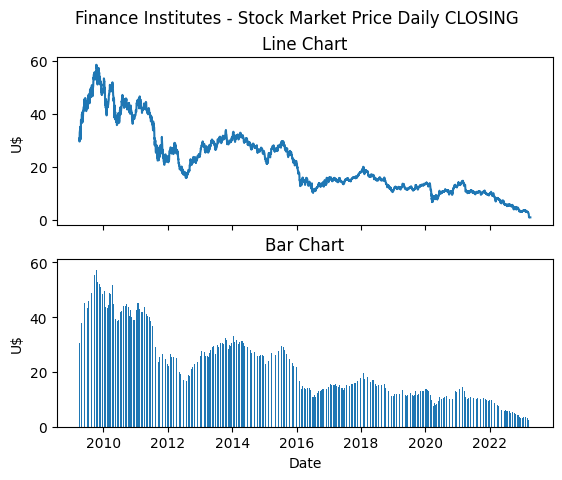

In [54]:
dataZ = data[['Date', 'Close']]

date_from = "2019-01-01"
date_to   = "2019-12-31"
df= dataZ[(dataX['Date'] > date_from) & (dataZ['Date'] < date_to)]

# create line/bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

fig, axs = plt.subplots(2, 1)

fig.suptitle("Finance Institutes - Stock Market Price Daily CLOSING")

axs[0].plot(dataZ.Date, dataZ.Close)
axs[0].set_title('Line Chart')

axs[1].bar(dataZ.Date, dataZ.Close)
axs[1].set_title('Bar Chart')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='U$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


---   
## **ADD ON:** Visualizing Time Series Data in **[Heatmap](https://www.analyticsvidhya.com/blog/2021/02/visualization-in-time-series-using-heatmaps-in-python/)** form


In [55]:
!pip install calplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8117 sha256=2fb1f6555258cc1b0034eb87d79e05a6102d82c4163de4a39b9fd0f6ea8a153d
  Stored in directory: /root/.cache/pip/wheels/77/75/32/a518a4a1421776a93e1ede33cb8dac474095bf31fed7e4e22c
Successfully built calplot


In [72]:
dataZ = data[['Date','Close']]

date_from = "2019-01-01"
date_to   = "2022-12-31"
df= dataZ[(dataZ['Date'] > date_from) & (dataZ['Date'] < date_to)]

df.head()

,Date,Close
2452,2019-01-02,11.04
2453,2019-01-03,10.95
2454,2019-01-04,11.31
2455,2019-01-07,11.39
2456,2019-01-08,11.55


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 2452 to 3459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1008 non-null   datetime64[ns]
 1   Close   1008 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.6 KB


In [74]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2019-01-02 to 2022-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1008 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


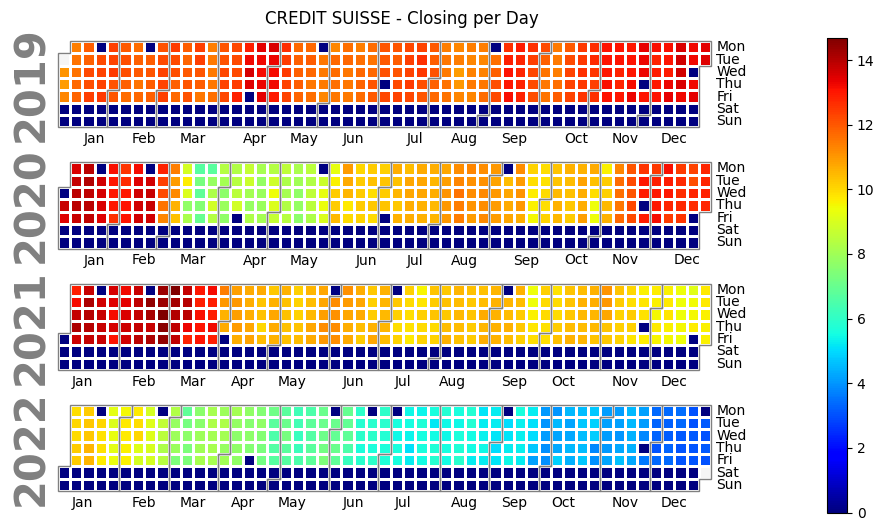

In [75]:
import calplot

fig1 = calplot.calplot(data = df['Close'],
                       cmap = 'jet',
                       figsize = (10, 5),
                       suptitle = "CREDIT SUISSE - Closing per Day",
                       )

import pylab
pylab.savefig('cs-heatmap.png')